## Example 1 : AMES Houses Price
Sujit Ojha - December 2017


----------

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

https://www.kaggle.com/c/house-prices-advanced-regression-techniques  
https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline

In [2]:
#Reading dataset
df = pd.read_csv('Dataset/ames_housing_trimmed_processed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
MSSubClass              1460 non-null int64
LotFrontage             1460 non-null float64
LotArea                 1460 non-null int64
OverallQual             1460 non-null int64
OverallCond             1460 non-null int64
YearBuilt               1460 non-null int64
Remodeled               1460 non-null int64
GrLivArea               1460 non-null int64
BsmtFullBath            1460 non-null int64
BsmtHalfBath            1460 non-null int64
FullBath                1460 non-null int64
HalfBath                1460 non-null int64
BedroomAbvGr            1460 non-null int64
Fireplaces              1460 non-null int64
GarageArea              1460 non-null int64
MSZoning_FV             1460 non-null int64
MSZoning_RH             1460 non-null int64
MSZoning_RL             1460 non-null int64
MSZoning_RM             1460 non-null int64
Neighborhood_Blueste    1460 non-null int64
Neighborhoo

# Objective
- Predicting sales prices

Understanding the Sales price

In [4]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5,0,'SalePrice $')

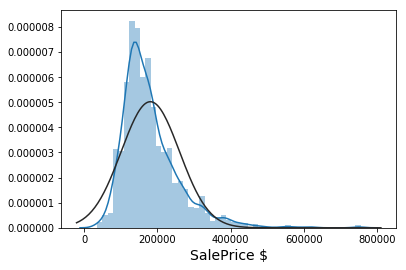

In [5]:
ax = sns.distplot(df['SalePrice'],fit=norm)
ax.set_xlabel('SalePrice $',fontsize=14)

- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

Analysis of Skewness and Kurtosis

skewness tells you the amount and direction of skew (departure from horizontal symmetry), and kurtosis tells you how tall and sharp the central peak is, relative to a standard bell curve.

https://brownmath.com/stat/shape.htm

In [6]:
# Skewness and Kurtosis
print("Skewness: {0:4.2f}".format(df['SalePrice'].skew()))
print("Kurtosis: {0:4.2f}".format(df['SalePrice'].kurt()))

Skewness: 1.88
Kurtosis: 6.54


If skewness is less than −1 or greater than +1, the distribution is highly skewed.  
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.  
If skewness is between −½ and +½, the distribution is approximately symmetric. 

A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.  
A distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.  
A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.  

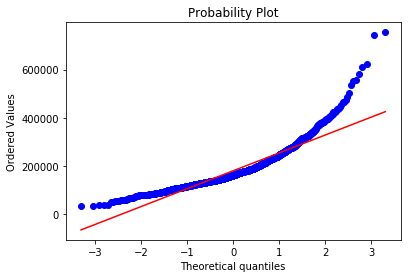

In [7]:
res = stats.probplot(df['SalePrice'], plot=plt)

In [8]:
import xgboost as xgb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
boston_data = df

In [10]:
X,y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [12]:
xg_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=10,seed=123)

In [13]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

In [14]:
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))

print("RMSE : {0:4.2f}".format(rmse))

RMSE : 78847.40


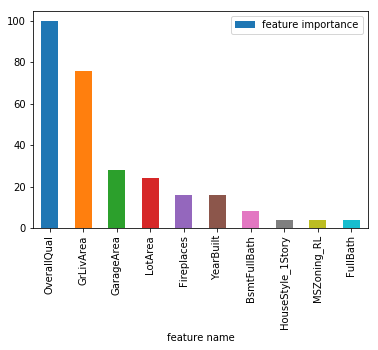

In [15]:
feature_importance = xg_reg.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

df_vif = pd.DataFrame({'feature name':X.columns,'feature importance':feature_importance})
df_vif.sort_values('feature importance',ascending=False,inplace=True)
df_vif[0:10].plot(x='feature name',y='feature importance',kind='bar')

In [16]:
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

In [17]:
params = {'booster':'gblinear','objective':'reg:linear'}

In [18]:
xg_reg1 = xgb.train(params=params,dtrain=DM_train,num_boost_round=10)

In [19]:
preds = xg_reg1.predict(DM_test)

In [20]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
print('RMSE : {0:4.2f}'.format(rmse))

RMSE : 40719.74


In [21]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, 
                    params=params, nfold=4, 
                    num_boost_round=10, 
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0   142980.433594    1193.791602    141767.531250      429.454591
1   104891.394532    1223.158855    102832.544922      322.469930
2    79478.937500    1601.344539     75872.615235      266.475960
3    62411.920899    2220.150028     57245.652343      273.625086
4    51348.279297    2963.377719     44401.298828      316.423666
5    44809.630859    3763.836679     35757.405274      383.551612
6    40621.514649    4110.150834     30050.220703      306.999944
7    38081.739258    4697.084685     26130.937500      297.750320
8    36262.141601    4941.403350     23510.478516      223.002297
9    35572.510742    5164.385589     21791.756348      195.496844
9    35572.510742
Name: test-rmse-mean, dtype: float64


In [22]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))


Best rmse as a function of l2:
    l2          rmse
0    1  52275.357421
1   10  57746.064453
2  100  76624.625000


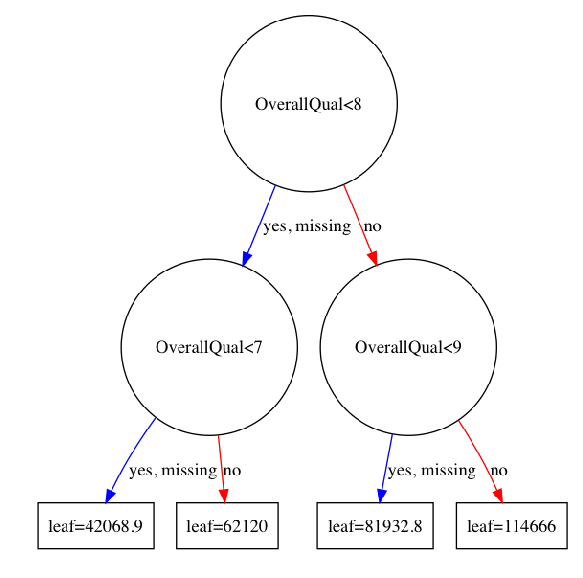

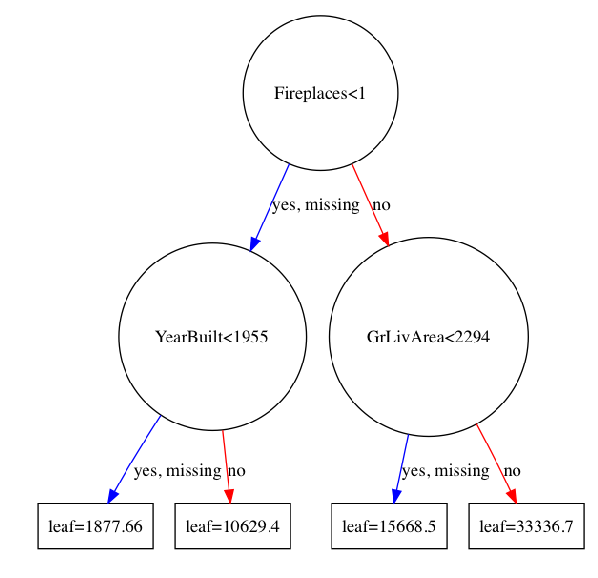

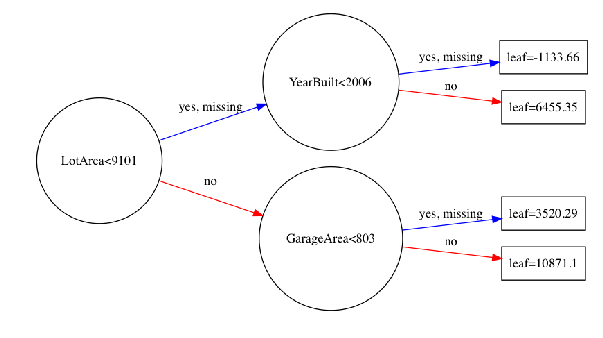

In [42]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg,num_trees=0)
#plt.show()
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg,num_trees=4)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg,num_trees=9,rankdir="LR")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

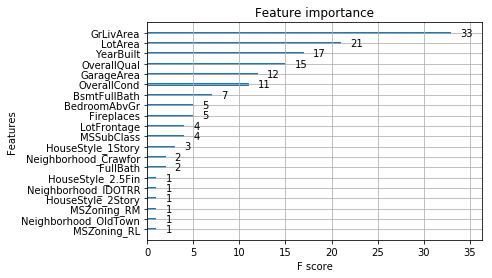

In [45]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X,y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear","max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=housing_dmatrix,params=params,num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()